In [1]:
from utils import *
from pathlib import Path

In [2]:
L = 50
subgrid = 20

# Visualization Initial-Final

Selected cases: 

- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.700_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.300_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv

iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.700_i_l_B-1.000_0.csv
iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.300_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv


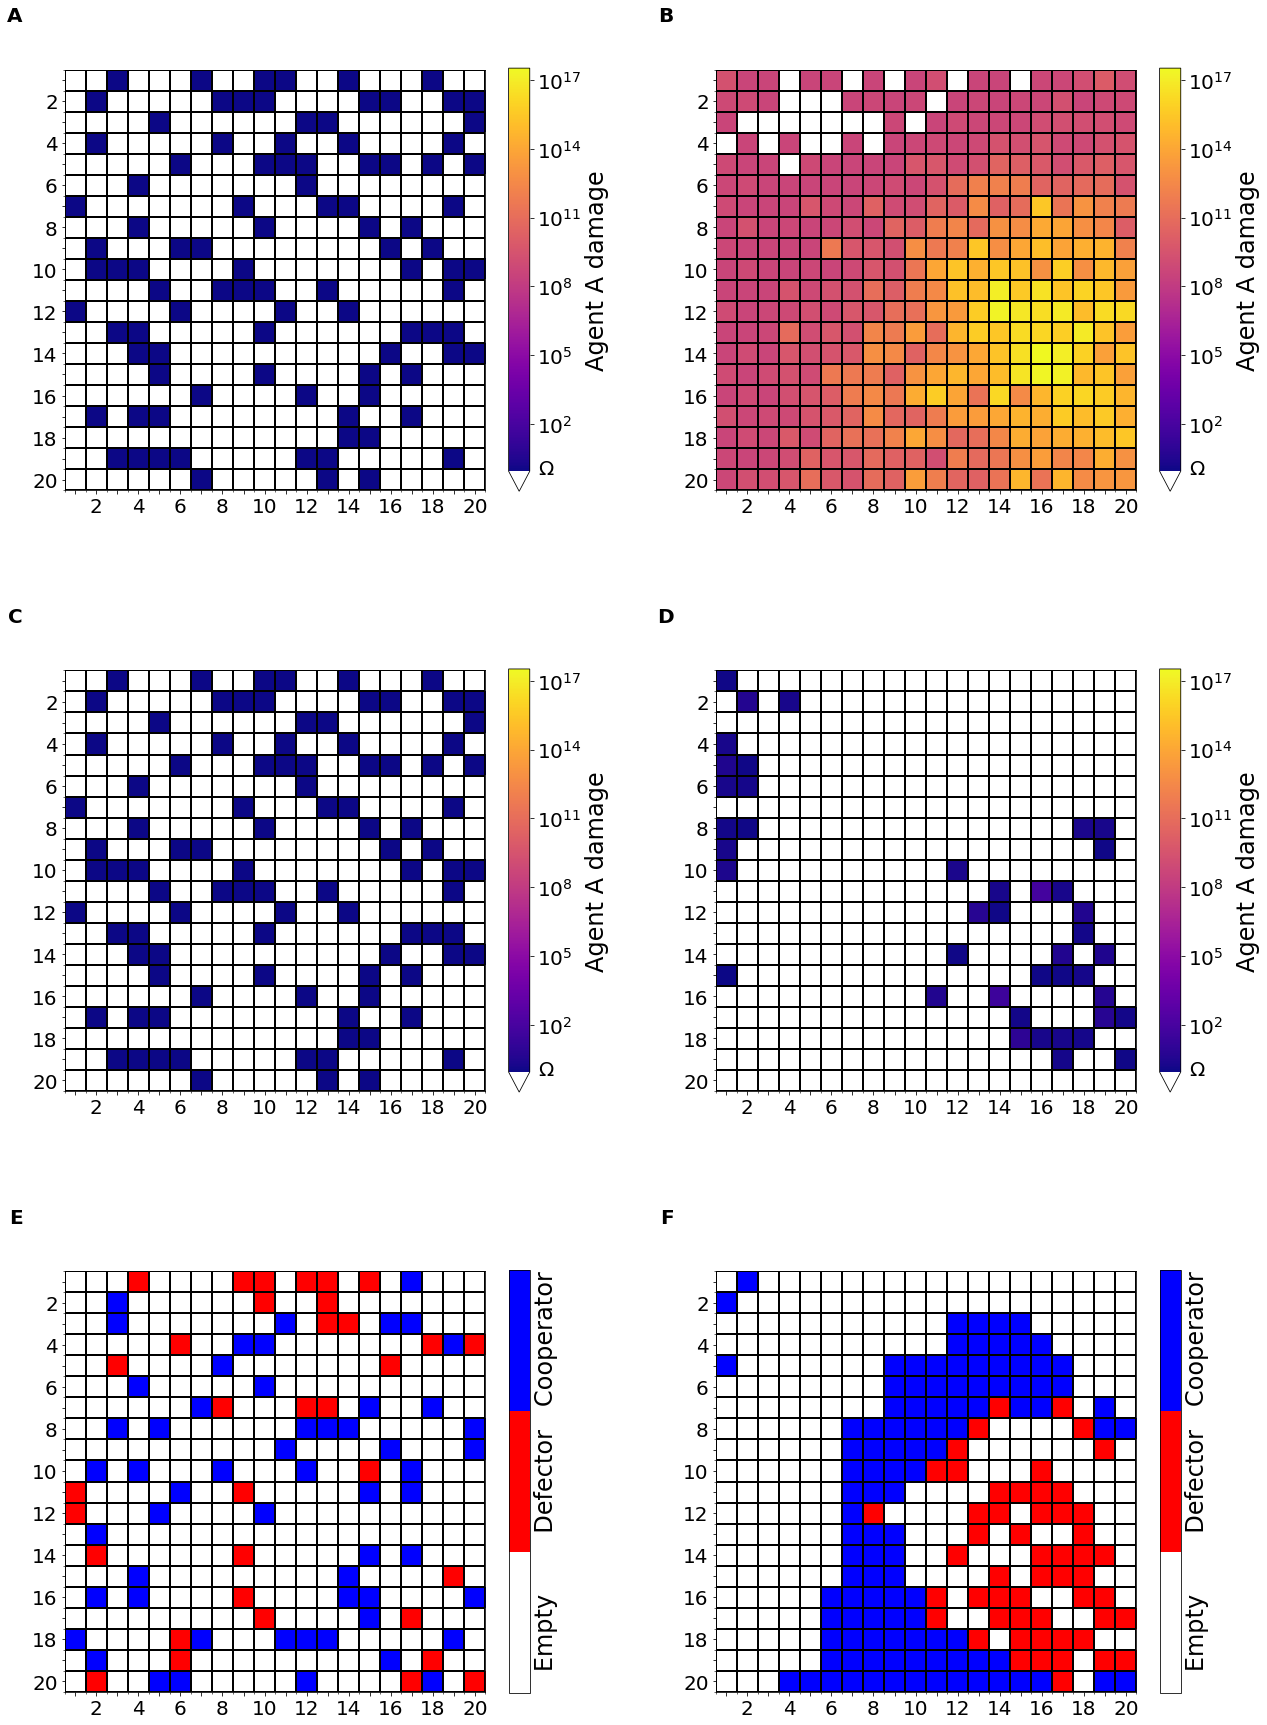

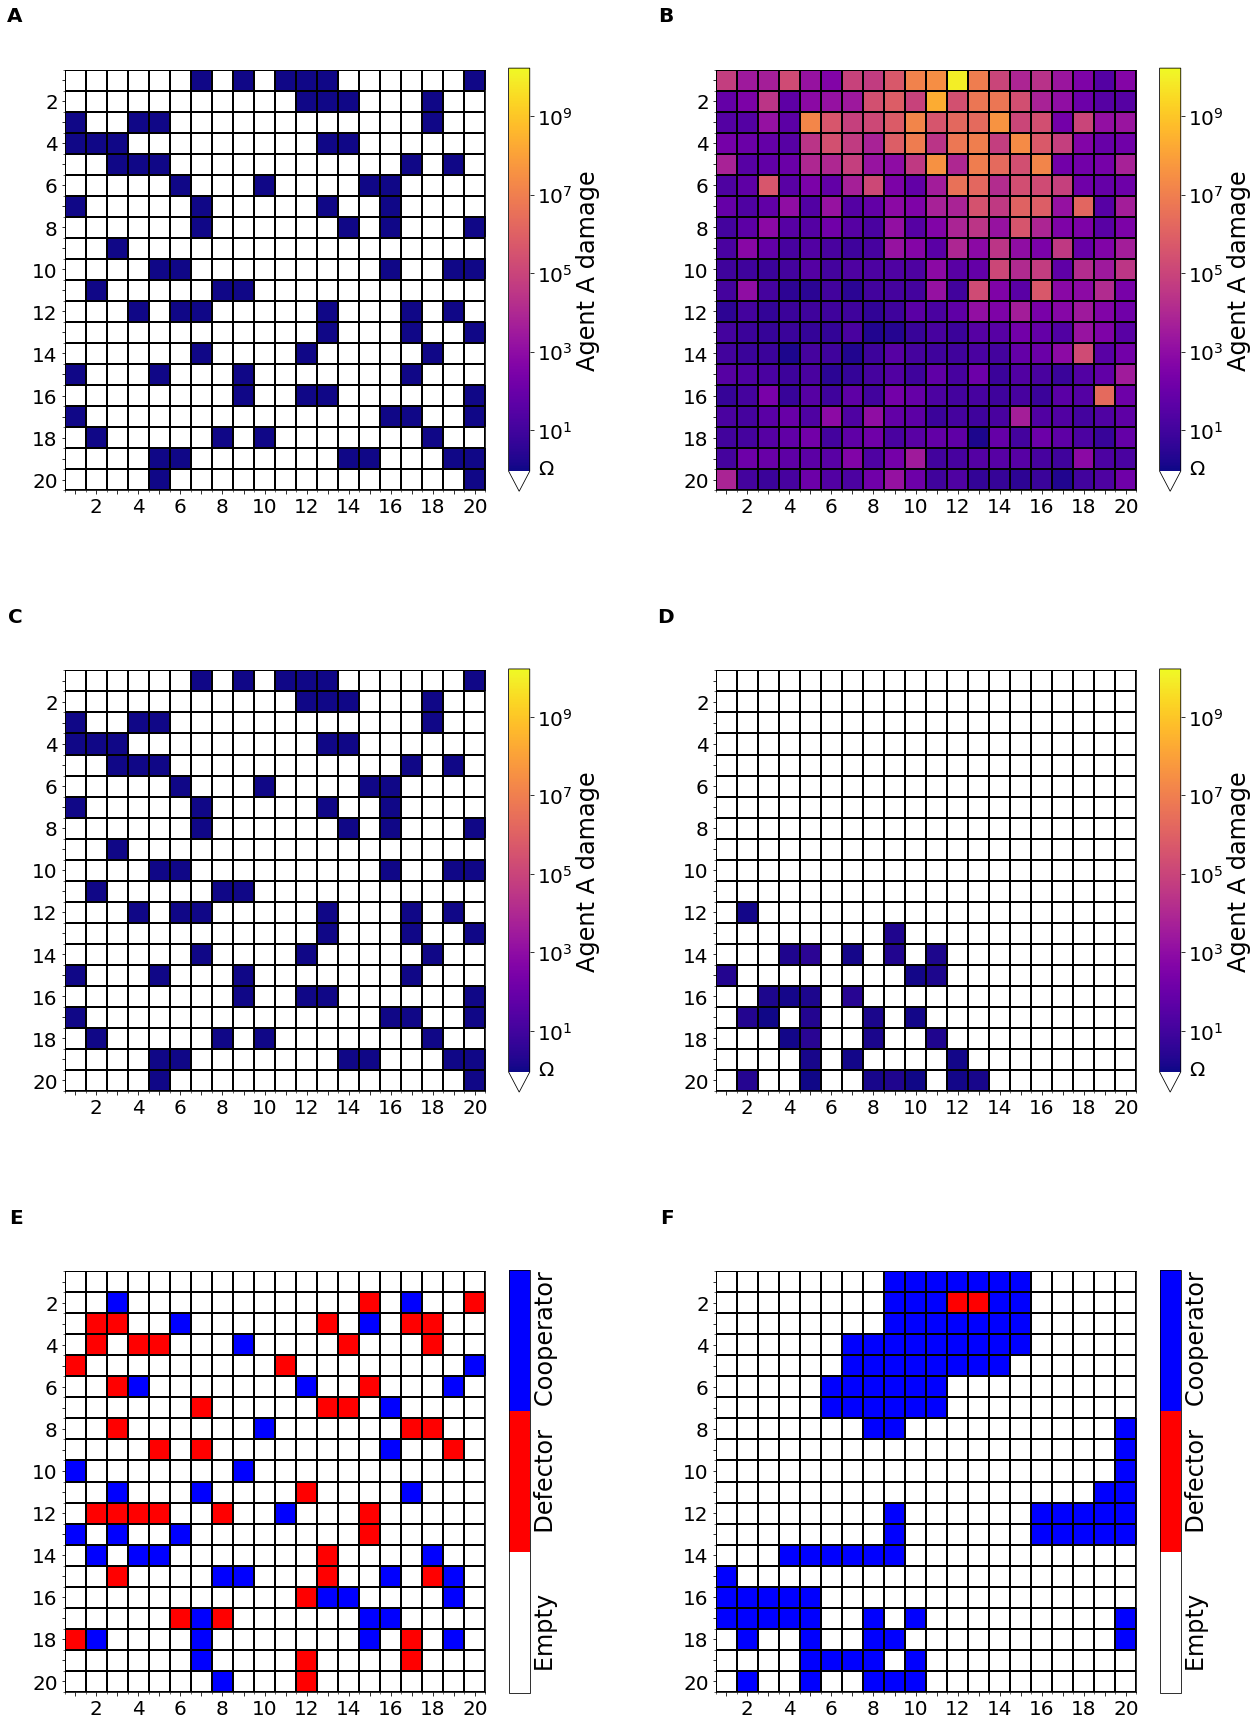

In [3]:
label = []
for i in range(1, subgrid + 1):
    if i % 2 == 1:
        label.append("")
    else:
        label.append(str(i))

path = os.path.abspath(os.getcwd()) 
path = os.path.abspath(os.path.join(path, os.pardir))
os.chdir(str(path)+"/Simulations")

scenario = ["iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.700_i_l_B-1.000_0.csv","iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.300_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv"]

for ids, s in enumerate(scenario):
    
    file = str(s).split("del")[-1]
    file = str(s).split(".csv")[0]
    
    print(s)
    
    if os.path.exists("AB-Model-t=0-" + str(file) + ".pdf") == False:
    
        i_c_l_B = float(file.split("i_c_l_B-")[-1][:5])
        threshold_life_A = float(file.split("t_l_A-")[-1][:5])

        Grids_A = pd.read_csv("Results_AB/grids_A/" + str(s), header=None)

        Grid_A_Matrix = Grid_Transform_A(Grids_A, 0, L)[0]
        Grid_A_Matrix_final = Grid_Transform_float(Grids_A, -1, L)[0]
        Grid_A_Matrix_subset = Grid_A_Matrix[0:subgrid, 0:subgrid]
        Grid_A_Matrix_final_subset = Grid_A_Matrix_final[0:subgrid, 0:subgrid]
        ListCoordA_x = Grid_Transform_A(Grids_A, 0, L)[1]
        ListCoordA_y = Grid_Transform_A(Grids_A, 0, L)[2]
        ListCoordA_effect = Grid_Transform_A(Grids_A, 0, L)[3]

        Allmoves_A = pd.read_csv("Results_AB/allmoves_A/" + str(s))
        Allmoves_A = Allmoves_A.replace(-1, 0)

        Grids_B = pd.read_csv("Results_AB/grids_B/" + str(s),header=None)

        Grid_B_Matrix = Grid_Transform_B(Grids_B, 0, L)[0]
        Grid_B_Matrix_final = Grid_Transform_B(Grids_B, -1, L)[0]
        Grid_B_Matrix_subset = Grid_B_Matrix[0:subgrid, 0:subgrid]
        Grid_B_Matrix_final_subset = Grid_B_Matrix_final[0:subgrid, 0:subgrid]
        ListCoordB_x = Grid_Transform_B(Grids_B, 0, L)[1]
        ListCoordB_y = Grid_Transform_B(Grids_B, 0, L)[2]
        ListCoordB_PD = Grid_Transform_B(Grids_B, 0, L)[3]

        Allmoves_B = pd.read_csv("Results_AB/allmoves_B/" + str(s))

        Grids_A_without_interaction = pd.read_csv(
            "Results_A/grids_A/" + str(s),
            header=None,
        )

        Grid_A_w_Matrix = Grid_Transform_A(Grids_A_without_interaction, 0, L)[0]
        Grid_A_w_Matrix_final = Grid_Transform_float(Grids_A_without_interaction, -1, L)[0]
        Grid_A_w_Matrix_subset = Grid_A_w_Matrix[0:subgrid, 0:subgrid]
        Grid_A_w_Matrix_final_subset = Grid_A_w_Matrix_final[0:subgrid, 0:subgrid]
        ListCoordAw_x = Grid_Transform_A(Grids_A_without_interaction, 0, L)[1]
        ListCoordAw_y = Grid_Transform_A(Grids_A_without_interaction, 0, L)[2]
        ListCoordAw_effect = Grid_Transform_A(Grids_A_without_interaction, 0, L)[3]

        Allmoves_A_without_interaction = pd.read_csv("Results_A/allmoves_A/" + str(s))
        Allmoves_A_without_interaction = Allmoves_A_without_interaction.replace(-1, 0)

        Grids_B_without_interaction = pd.read_csv(
            "Results_B/grids_B/" + str(s),
            header=None,
        )

        Grid_B_w_Matrix = Grid_Transform_B(Grids_B_without_interaction, 0, L)[0]
        Grid_B_w_Matrix_final = Grid_Transform_B(Grids_B_without_interaction, -1, L)[0]
        Grid_B_w_Matrix_subset = Grid_B_w_Matrix[0:subgrid, 0:subgrid]
        Grid_B_w_Matrix_final_subset = Grid_B_w_Matrix_final[0:subgrid, 0:subgrid]
        ListCoordBw_x = Grid_Transform_B(Grids_B_without_interaction, 0, L)[1]
        ListCoordBw_y = Grid_Transform_B(Grids_B_without_interaction, 0, L)[2]
        ListCoordBw_PD = Grid_Transform_B(Grids_B_without_interaction, 0, L)[3]

        Allmoves_B_without_interaction = pd.read_csv("Results_B/allmoves_B/" + str(s))

        subGridA = Allmoves_A
        subGridAw = Allmoves_A_without_interaction

        max_effect_R = subGridA["amount_dest_after"].max()
        max_effect_M = subGridA["new_amount_focal_A"].max()
        max_effect = 0
        if max_effect_R > max_effect_M:
            max_effect = max_effect_R
        else:
            max_effect = max_effect_M

        max_effect_Rw = subGridAw["amount_dest_after"].max()
        max_effect_Mw = subGridAw["new_amount_focal_A"].max()
        max_effectw = 0
        if max_effect_Rw > max_effect_Mw:
            max_effectw = max_effect_Rw
        else:
            max_effectw = max_effect_Mw

        if max_effect < max_effectw:
            max_effect = max_effectw

        Timestep = pd.concat(
            [
                Allmoves_A["simul_step"],
                Allmoves_A_without_interaction["simul_step"],
                Allmoves_B["simul_step"],
                Allmoves_A_without_interaction["simul_step"],
            ]
        )
        Timeframe = Timestep.value_counts().index.tolist()
        Timeframe.sort()

        fig = plt.figure(figsize=([20, 30]))
        gs = gridspec.GridSpec(3, 2)
        gs.update(wspace=0.4, hspace=0.4)

        ax1 = plt.subplot(gs[0, 0:1])
        ax1.text(
            -0.1,
            1.15,
            "A",
            transform=ax1.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )

        ax2 = plt.subplot(gs[0, 1:2])
        ax2.text(
            -0.1,
            1.15,
            "B",
            transform=ax2.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )
        ax3 = plt.subplot(gs[1, 0:1])
        ax3.text(
            -0.1,
            1.15,
            "C",
            transform=ax3.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )
        ax4 = plt.subplot(gs[1, 1:2])
        ax4.text(
            -0.1,
            1.15,
            "D",
            transform=ax4.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )
        ax5 = plt.subplot(gs[2, 0:1])
        ax5.text(
            -0.1,
            1.15,
            "E",
            transform=ax5.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )
        ax6 = plt.subplot(gs[2, 1:2])
        ax6.text(
            -0.1,
            1.15,
            "F",
            transform=ax6.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )

        im_ratio = Grid_A_Matrix_subset.shape[0] / Grid_A_Matrix_subset.shape[1]

        cmap1 = mpl.cm.get_cmap("plasma").copy()
        cmap1.set_under("w")

        im1 = ax1.imshow(
                Grid_A_w_Matrix_subset,
                cmap=cmap1,
                norm = colors.LogNorm(vmin=threshold_life_A, vmax=max_effect),
        )

        cb = plt.colorbar(im1, ax=ax1, fraction=0.0455 * im_ratio, extend="min")
        cb.set_label("Agent A damage", fontsize=24)
        cb.ax.tick_params(labelsize=20)
        ax1.text (22,18.75, r"$\Omega$", fontsize = 20)
        ax1.tick_params(labelsize=20)

        # Major ticks
        ax1.set_xticks(np.arange(0, subgrid, 1))
        ax1.set_yticks(np.arange(0, subgrid, 1))

        # Labels for major ticks
        ax1.set_xticklabels(label)
        ax1.set_yticklabels(label)

        # Minor ticks
        ax1.set_xticks(np.arange(-0.5, subgrid, 1), minor=True)
        ax1.set_yticks(np.arange(-0.5, subgrid, 1), minor=True)

        # subgridines based on minor ticks
        ax1.grid(which="minor", color="black", linestyle="-", linewidth=2)

        cmap2 = mpl.cm.get_cmap("plasma").copy()
        cmap2.set_under("w")

        im2 = ax2.imshow(
                Grid_A_w_Matrix_final_subset,
                cmap=cmap2,
                norm = colors.LogNorm(vmin=threshold_life_A, vmax=max_effect),
        )

        cb2 = plt.colorbar(im2, ax=ax2, fraction=0.0455 * im_ratio, extend="min")
        cb2.set_label("Agent A damage", fontsize=24)
        cb2.ax.tick_params(labelsize=20)
        ax2.text (22,18.75, r"$\Omega$", fontsize = 20)
        ax2.tick_params(labelsize=20)

        # Major ticks
        ax2.set_xticks(np.arange(0, subgrid, 1))
        ax2.set_yticks(np.arange(0, subgrid, 1))

        # Labels for major ticks
        ax2.set_xticklabels(label)
        ax2.set_yticklabels(label)

        # Minor ticks
        ax2.set_xticks(np.arange(-0.5, subgrid, 1), minor=True)
        ax2.set_yticks(np.arange(-0.5, subgrid, 1), minor=True)

        # subgridines based on minor ticks
        ax2.grid(which="minor", color="black", linestyle="-", linewidth=2)

        cmap3 = mpl.cm.get_cmap("plasma").copy()
        cmap3.set_under("w")

        im3 = ax3.imshow(
                Grid_A_Matrix_subset,
                cmap=cmap3,
                norm = colors.LogNorm(vmin=threshold_life_A, vmax=max_effect),
        )

        cb3 = plt.colorbar(im3, ax=ax3, fraction=0.0455 * im_ratio, extend="min")
        cb3.set_label("Agent A damage", fontsize=24)
        cb3.ax.tick_params(labelsize=20)
        ax3.text (22,18.75, r"$\Omega$", fontsize = 20)
        ax3.tick_params(labelsize=20)

        # Major ticks
        ax3.set_xticks(np.arange(0, subgrid, 1))
        ax3.set_yticks(np.arange(0, subgrid, 1))

        # Labels for major ticks
        ax3.set_xticklabels(label)
        ax3.set_yticklabels(label)

        # Minor ticks
        ax3.set_xticks(np.arange(-0.5, subgrid, 1), minor=True)
        ax3.set_yticks(np.arange(-0.5, subgrid, 1), minor=True)

        # subgridines based on minor ticks
        ax3.grid(which="minor", color="black", linestyle="-", linewidth=2)

        cmap4 = mpl.cm.get_cmap("plasma").copy()
        cmap4.set_under("w")

        im4 = ax4.imshow(
                Grid_A_Matrix_final_subset,
                cmap=cmap4,
                norm = colors.LogNorm(vmin=threshold_life_A, vmax=max_effect),
        )

        cb4 = plt.colorbar(im4, ax=ax4, fraction=0.0455 * im_ratio, extend="min")
        cb4.set_label("Agent A damage", fontsize=24)
        cb4.ax.tick_params(labelsize=20)
        ax4.text (22,18.75, r"$\Omega$", fontsize = 20)
        ax4.tick_params(labelsize=20)

        # Major ticks
        ax4.set_xticks(np.arange(0, subgrid, 1))
        ax4.set_yticks(np.arange(0, subgrid, 1))

        # Labels for major ticks
        ax4.set_xticklabels(label)
        ax4.set_yticklabels(label)

        # Minor ticks
        ax4.set_xticks(np.arange(-0.5, subgrid, 1), minor=True)
        ax4.set_yticks(np.arange(-0.5, subgrid, 1), minor=True)

        # subgridines based on minor ticks
        ax4.grid(which="minor", color="black", linestyle="-", linewidth=2)

        cmap5 = mpl.cm.get_cmap("plasma").copy()
        cmap5.set_under("w")

        cmap5 = colors.ListedColormap(["w", "red", "blue"])
        im5 = ax5.imshow(Grid_B_Matrix_subset, cmap=cmap5)
        cb5 = plt.colorbar(im5, ax=ax5, fraction=0.0455 * im_ratio)
        cb5.set_label(
            r"   Empty        Defector   Cooperator",
            fontsize=24,
        )
        cb5.set_ticks([])
        ax5.tick_params(labelsize=20)

        # Major ticks
        ax5.set_xticks(np.arange(0, subgrid, 1))
        ax5.set_yticks(np.arange(0, subgrid, 1))

        # Labels for major ticks
        ax5.set_xticklabels(label)
        ax5.set_yticklabels(label)

        # Minor ticks
        ax5.set_xticks(np.arange(-0.5, subgrid, 1), minor=True)
        ax5.set_yticks(np.arange(-0.5, subgrid, 1), minor=True)

        # Gridlines based on minor ticks
        ax5.grid(which="minor", color="black", linestyle="-", linewidth=2)



        cmap6 = colors.ListedColormap(["w", "red", "blue"])
        im6 = ax6.imshow(Grid_B_Matrix_final_subset, cmap=cmap6)
        cb6 = plt.colorbar(im6, ax=ax6, fraction=0.0455 * im_ratio)
        cb6.set_label(
            r"   Empty        Defector   Cooperator",
            fontsize=24,
        )
        cb6.set_ticks([])
        ax6.tick_params(labelsize=20)

        # Major ticks
        ax6.set_xticks(np.arange(0, subgrid, 1))
        ax6.set_yticks(np.arange(0, subgrid, 1))

        # Labels for major ticks
        ax6.set_xticklabels(label)
        ax6.set_yticklabels(label)

        # Minor ticks
        ax6.set_xticks(np.arange(-0.5, subgrid, 1), minor=True)
        ax6.set_yticks(np.arange(-0.5, subgrid, 1), minor=True)

        # Gridlines based on minor ticks
        ax6.grid(which="minor", color="black", linestyle="-", linewidth=2)

        fig.savefig("Latex-AB-Model-t=0-" + str(file) + ".pdf")   

## Visualization Damage diff vs Timestep and Cooperation level vs Timestep

In [ ]:
label = []
for i in range(1, subgrid + 1):
    if i % 2 == 1:
        label.append("")
    else:
        label.append(str(i))

path = os.path.abspath(os.getcwd()) 
path = os.path.abspath(os.path.join(path, os.pardir))
os.chdir(str(path)+"/Simulations")

scenario = ["iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.700_i_l_B-1.000_0.csv","iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.300_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv"]

for ids, s in enumerate(scenario):
    print(s)
    
    try:
        file = str(s).split("del")[-1]
        file = str(s).split(".csv")[0]
    
        i_c_l_B = float(file.split("i_c_l_B-")[-1][:5])
        threshold_life_A = float(file.split("t_l_A-")[-1][:5])
        
        Grids_A = pd.read_csv("Results_AB/grids_A/" + str(s), header=None)

        Grid_A_Matrix = Grid_Transform_A(Grids_A, 0, L)[0]
        Grid_A_Matrix_subset = Grid_A_Matrix[0:subgrid, 0:subgrid]

        Allmoves_A = pd.read_csv("Results_AB/allmoves_A/" + str(s))
        Allmoves_A = Allmoves_A.replace(-1, 0)

        Grids_A_without_interaction = pd.read_csv(
            "Results_A/grids_A/" + str(s), header=None
        )

        Grid_A_w_Matrix = Grid_Transform_A(Grids_A_without_interaction, 0, L)[0]       
        Grid_A_w_Matrix_subset = Grid_A_w_Matrix[0:subgrid, 0:subgrid]


        Allmoves_A_without_interaction = pd.read_csv("Results_A/allmoves_A/" + str(s))
        Allmoves_A_without_interaction = Allmoves_A_without_interaction.replace(-1, 0)
        
        Allmoves_B = pd.read_csv("Results_AB/allmoves_B/" + str(s))
        
        subGridA = Allmoves_A
        subGridAw = Allmoves_A_without_interaction
        
        max_effect_R = subGridA["amount_dest_after"].max()
        max_effect_M = subGridA["new_amount_focal_A"].max()
        max_effect = 0
        if max_effect_R > max_effect_M:
            max_effect = max_effect_R
        else:
            max_effect = max_effect_M

        max_effect_Rw = subGridAw["amount_dest_after"].max()
        max_effect_Mw = subGridAw["new_amount_focal_A"].max()
        max_effectw = 0
        if max_effect_Rw > max_effect_Mw:
            max_effectw = max_effect_Rw
        else:
            max_effectw = max_effect_Mw

        if max_effect < max_effectw:
            max_effect = max_effectw
                
        Timeframe = list(range(0,250000))
        
        times_te_A = [0]
        times_te_Aw = [0]
        total_effect_A = [np.sum(Grid_A_Matrix)]
        total_effect_Aw = [np.sum(Grid_A_w_Matrix)]
        Diff_A_Aw = [0]

        te_A = total_effect_A[0]
        te_Aw = total_effect_Aw[0]
        
        times_coop_B = [0]
        coop_B = [0.5]
        
        for idx, x in enumerate(Timeframe):
            print(ids, idx/len(Timeframe))
            if len(Allmoves_A.loc[Allmoves_A["simul_step"] == x]) > 0:
                k = Allmoves_A.loc[Allmoves_A["simul_step"] == x].index.values
                for a in k:    
                    if (
                        Allmoves_A["action_type"][a] == "R"
                        or Allmoves_A["action_type"][a] == "D"
                        or Allmoves_A["action_type"][a] == "DC"
                    ):
                        te_A = te_A + (
                            Allmoves_A["new_amount_focal_A"][a]
                            - Allmoves_A["old_amount_focal_A"][a]
                        )

                    elif Allmoves_A["action_type"][a] == "M":
                        te_A = (
                            te_A
                            + (
                                Allmoves_A["new_amount_focal_A"][a]
                                - Allmoves_A["old_amount_focal_A"][a]
                            )
                            + (
                                Allmoves_A["amount_dest_after"][a]
                                - Allmoves_A["amount_dest_before"][a]
                            )
                        )
                total_effect_A.append(te_A)
                times_te_A.append(x)
                
            else:
                total_effect_A.append(total_effect_A[idx])
                times_te_A.append(x)
        
            if len(Allmoves_A_without_interaction.loc[Allmoves_A_without_interaction["simul_step"] == x]) > 0:
                k = Allmoves_A_without_interaction.loc[Allmoves_A_without_interaction["simul_step"] == x].index.values
                for a in k:  
                    if Allmoves_A_without_interaction["action_type"][a] == "R":
                        te_Aw = te_Aw + (
                            Allmoves_A_without_interaction["new_amount_focal_A"][a]
                            - Allmoves_A_without_interaction["old_amount_focal_A"][a]
                        )
                    elif Allmoves_A_without_interaction["action_type"][a] == "M":
                        te_Aw = (
                            te_Aw
                            + (
                                Allmoves_A_without_interaction["new_amount_focal_A"][a]
                                - Allmoves_A_without_interaction["old_amount_focal_A"][a]
                            )
                            + (
                                Allmoves_A_without_interaction["amount_dest_after"][a]
                                - Allmoves_A_without_interaction["amount_dest_before"][a]
                            )
                        )
                    total_effect_Aw.append(te_Aw)
                    times_te_Aw.append(x)
                    Diff_A_Aw.append((total_effect_Aw[idx]-total_effect_A[idx])/max_effect)
            else:
                total_effect_Aw.append(total_effect_Aw[idx])
                times_te_Aw.append(x) 
                Diff_A_Aw.append((total_effect_Aw[idx]-total_effect_A[idx])/max_effect)

            if len(Allmoves_B.loc[Allmoves_B["simul_step"] == x]) > 0:
                k = Allmoves_B.loc[Allmoves_B["simul_step"] == x].index.values
                for a in k:
                    CoopLevel = Allmoves_B["cooperators"][a]/(Allmoves_B["cooperators"][a] + Allmoves_B["defectors"][a])
                    if a == k[-1]:
                        times_coop_B.append(x)
                        coop_B.append(CoopLevel)
            else:
                times_coop_B.append(x)
                coop_B.append(coop_B[idx])
        
            
        fig = plt.figure(figsize=([20, 10]))
        gs = gridspec.GridSpec(1, 2)
        gs.update(wspace=0.4, hspace=0.4)
        
        ax1 = plt.subplot(gs[0:1, 0:1])
        ax1.text(
            -0.1,
            1.15,
            "A",
            transform=ax1.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )
        ax2 = plt.subplot(gs[0:1, 1:2])
        ax2.text(
            -0.1,
            1.15,
            "B",
            transform=ax2.transAxes,
            fontsize=20,
            fontweight="bold",
            va="top",
            ha="right",
        )
        
        ax1.scatter(
            times_te_Aw,
            total_effect_A/max(total_effect_A), 
            color="purple",
            s = 2
        )
        
        ax2.scatter(
            times_coop_B, 
            coop_B, 
            color="blue",
            s= 2
        )
        
        ax1.set_xlabel(r"Timestep, $t$", fontsize=24)
        ax1.set_ylabel(r" Agents A damage, $\varepsilon_{\%}$", fontsize=24)
        ax1.tick_params(labelsize=20)
        
        ax2.set_xlabel(r"Timestep, $t$", fontsize=24)
        ax2.set_ylabel(r"Cooperation level, $C_L$", fontsize=24)
        ax2.set_ylim([0.45, 1.01])
        ax2.tick_params(labelsize=20)
        
        fig.savefig("Latex2-AB-Model-t=0-" + str(file) + ".pdf") 
        
    except:
        print("Exception")
        pass

iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-4_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.700_i_l_B-1.000_0.csv
0 0.0
0 4e-06
0 8e-06
0 1.2e-05
0 1.6e-05
0 2e-05
0 2.4e-05
0 2.8e-05
0 3.2e-05
0 3.6e-05
0 4e-05
0 4.4e-05
0 4.8e-05
0 5.2e-05
0 5.6e-05
0 6e-05
0 6.4e-05
0 6.8e-05
0 7.2e-05
0 7.6e-05
0 8e-05
0 8.4e-05
0 8.8e-05
0 9.2e-05
0 9.6e-05
0 0.0001
0 0.000104
0 0.000108
0 0.000112
0 0.000116
0 0.00012
0 0.000124
0 0.000128
0 0.000132
0 0.000136
0 0.00014
0 0.000144
0 0.000148
0 0.000152
0 0.000156
0 0.00016
0 0.000164
0 0.000168
0 0.000172
0 0.000176
0 0.00018
0 0.000184
0 0.000188
0 0.000192
0 0.000196
0 0.0002
0 0.000204
0 0.000208
0 0.000212
0 0.000216
0 0.00022
0 0.000224
0 0.000228
0 0.000232
0 0.000236
0 0.00024
0 0.000244
0 0.000248
0 0.000252
0 0.000256
0 0.00026
0 0.000264
0 0.000268
0 0.000272
0 0.000276
0 0.00028
0 0.000284
0 0.000288
0 0.000292
0 0.000296
0 0.0003
0 0.000304
0 0.000308
0 0.000312
0 0.000316
0 0.00032
0 

# Visualization Difference between "Agents A without Interaction" and "Agents A with Interaction" vs Timestep for 10 Simulations

Selected cases:
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.300_g_r_A-0.500_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.500_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.200_g_r_A-0.200_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.200_d_r_A-0.500_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.200_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.300_g_r_A-0.500_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.300_g_r_A-0.500_d_r_A-0.500_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.200_g_r_A-0.500_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.200_g_r_A-0.200_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv
- iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.200_g_r_A-0.500_d_r_A-0.500_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv

In [ ]:
label = []
for i in range(1, subgrid + 1):
    if i % 2 == 1:
        label.append("")
    else:
        label.append(str(i))

path = os.getcwd()        
os.chdir(str(path)+"/Simulations")

scenario = ["iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.300_g_r_A-0.500_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.500_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv", 
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.200_g_r_A-0.200_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.200_d_r_A-0.500_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.200_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.500_g_r_A-0.100_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.300_g_r_A-0.500_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.300_g_r_A-0.500_d_r_A-0.500_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.200_g_r_A-0.500_d_r_A-0.200_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv",
            "iter-100_l-50_h-50_d_A-0.250_d_B-0.250_m_r_A-2_m_r_B-2_r_m_A-0.200_r_r_A-0.200_g_r_A-0.200_d_r_A-0.100_t_l_A-0.900_p-0.100_t-1.300_i_c_l_B-0.500_i_l_B-1.000_0.csv"]
           
            
Timeframe = list(range(0,250000))
Diff_scenarios = []
CoopL_scenarios = []

for ids, s in enumerate(scenario):
    print(s)
    try:
        file = str(s).split("del")[-1]
        file = str(s).split(".csv")[0]

        i_c_l_B = float(file.split("i_c_l_B-")[-1][:5])
        threshold_life_A = float(file.split("t_l_A-")[-1][:5])

        Grids_A = pd.read_csv("Results_AB/grids_A/" + str(s), header=None)

        Grid_A_Matrix = Grid_Transform_A(Grids_A, 0, L)[0]
        Grid_A_Matrix_subset = Grid_A_Matrix[0:subgrid, 0:subgrid]

        Allmoves_A = pd.read_csv("Results_AB/allmoves_A/" + str(s))
        Allmoves_A = Allmoves_A.replace(-1, 0)

        Grids_A_without_interaction = pd.read_csv(
            "Results_A/grids_A/" + str(s), header=None
        )

        Grid_A_w_Matrix = Grid_Transform_A(Grids_A_without_interaction, 0, L)[0]
        Grid_A_w_Matrix_subset = Grid_A_w_Matrix[0:subgrid, 0:subgrid]


        Allmoves_A_without_interaction = pd.read_csv("Results_A/allmoves_A/" + str(s))
        Allmoves_A_without_interaction = Allmoves_A_without_interaction.replace(-1, 0)
        
        Allmoves_B = pd.read_csv("Results_AB/allmoves_B/" + str(s))
        
        subGridA = Allmoves_A
        subGridAw = Allmoves_A_without_interaction
        
        max_effect_R = subGridA["amount_dest_after"].max()
        max_effect_M = subGridA["new_amount_focal_A"].max()
        max_effect = 0
        if max_effect_R > max_effect_M:
            max_effect = max_effect_R
        else:
            max_effect = max_effect_M

        max_effect_Rw = subGridAw["amount_dest_after"].max()
        max_effect_Mw = subGridAw["new_amount_focal_A"].max()
        max_effectw = 0
        if max_effect_Rw > max_effect_Mw:
            max_effectw = max_effect_Rw
        else:
            max_effectw = max_effect_Mw

        if max_effect < max_effectw:
            max_effect = max_effectw
        
        Timeframe = list(range(0,250000))
          
        times_te_A = [0]
        times_te_Aw = [0]
        total_effect_A = [np.sum(Grid_A_Matrix)]
        total_effect_Aw = [np.sum(Grid_A_w_Matrix)]
        Diff_A_Aw = [0]

        te_A = total_effect_A[0]
        te_A_no =[0]
        te_Aw = total_effect_Aw[0]

        
        times_coop_B = [0]
        coop_B = [0.5]
        
        for idx, x in enumerate(Timeframe):
            if len(Allmoves_A.loc[Allmoves_A["simul_step"] == x]) > 0:
                k = Allmoves_A.loc[Allmoves_A["simul_step"] == x].index.values
                for a in k:    
                    if (
                        Allmoves_A["action_type"][a] == "R"
                        or Allmoves_A["action_type"][a] == "D"
                        or Allmoves_A["action_type"][a] == "DC"
                    ):
                        te_A = te_A + (
                            Allmoves_A["new_amount_focal_A"][a]
                            - Allmoves_A["old_amount_focal_A"][a]
                        )
                        
                    elif Allmoves_A["action_type"][a] == "M":
                        te_A = (
                            te_A
                            + (
                                Allmoves_A["new_amount_focal_A"][a]
                                - Allmoves_A["old_amount_focal_A"][a]
                            )
                            + (
                                Allmoves_A["amount_dest_after"][a]
                                - Allmoves_A["amount_dest_before"][a]
                            )
                        )
                        
                total_effect_A.append(te_A)
                times_te_A.append(x)
                
            else:
                total_effect_A.append(total_effect_A[idx])
                times_te_A.append(x)
        
            if len(Allmoves_A_without_interaction.loc[Allmoves_A_without_interaction["simul_step"] == x]) > 0:
                k = Allmoves_A_without_interaction.loc[Allmoves_A_without_interaction["simul_step"] == x].index.values
                for a in k:  
                    if Allmoves_A_without_interaction["action_type"][a] == "R":
                        te_Aw = te_Aw + (
                            Allmoves_A_without_interaction["new_amount_focal_A"][a]
                            - Allmoves_A_without_interaction["old_amount_focal_A"][a]
                        )
                    elif Allmoves_A_without_interaction["action_type"][a] == "M":
                        te_Aw = (
                            te_Aw
                            + (
                                Allmoves_A_without_interaction["new_amount_focal_A"][a]
                                - Allmoves_A_without_interaction["old_amount_focal_A"][a]
                            )
                            + (
                                Allmoves_A_without_interaction["amount_dest_after"][a]
                                - Allmoves_A_without_interaction["amount_dest_before"][a]
                            )
                        )
                    total_effect_Aw.append(te_Aw)
                    times_te_Aw.append(x)
                    Diff_A_Aw.append((total_effect_Aw[idx]-total_effect_A[idx])/max_effect)
            else:
                total_effect_Aw.append(total_effect_Aw[idx])
                times_te_Aw.append(x) 
                Diff_A_Aw.append((total_effect_Aw[idx]-total_effect_A[idx])/max_effect)
    except:
        print("Exception")
        pass
    
    with open("Diff_A_Aw"+str(ids)+".txt", 'w') as f:
        for s in Diff_A_Aw:
            f.write(str(s) + '\n')
        
    Diff_scenarios.append(Diff_A_Aw)

MeanDiff_s = np.mean(Diff_scenarios, axis = 0)
StdevDiff_s = np.std(Diff_scenarios, axis = 0)

## Store List for the Graphs

In [ ]:
with open("MeanDiff_s.txt", 'w') as f:
    for s in MeanDiff_s:
        f.write(str(s) + '\n')
        
with open("MeanCoopL_s.txt", 'w') as f:
    for s in MeanCoopL_s:
        f.write(str(s) + '\n')

with open("Diff_scenarios.txt", 'w') as f:
    for s in Diff_scenarios:
        f.write(str(s) + '\n')

# Part treating Diff and Coop

In [ ]:
Timeframe = list(range(0,250000))
Timeframe.insert(0,0)

with open("Diff_scenarios.txt", 'r') as f:
    Diff_scenarios = [line.rstrip('\n') for line in f]

with open("MeanDiff_s.txt", 'r') as f:
    MeanDiff_s = [line.rstrip('\n') for line in f]

with open("MeanCoopL_s.txt", 'r') as f:
    MeanCoopL_s = [line.rstrip('\n') for line in f]
print(len(Diff_scenarios))

MeanDiff_s = [float(x) for x in MeanDiff_s]
print(type(MeanDiff_s[0]))
MeanCoopL_s = [float(x) for x in MeanCoopL_s]
print(type(MeanCoopL_s[0]))

fig = plt.figure(figsize=([30, 30]))
# fig.suptitle("Characteristics of Simulation", fontsize=30)
# fig.text(0.1, 0.05, "Config: " + str(s), fontsize=20)
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.4, hspace=0.4)

ax1 = plt.subplot(gs[0:1, 0:2])
ax1.text(
    -0.1,
    1.15,
    "A",
    transform=ax1.transAxes,
    fontsize=20,
    fontweight="bold",
    va="top",
    ha="right",
)
ax2 = plt.subplot(gs[0:1, 2:4])
ax2.text(
    -0.1,
    1.15,
    "B",
    transform=ax2.transAxes,
    fontsize=20,
    fontweight="bold",
    va="top",
    ha="right",
)

ax3 = plt.subplot(gs[1:2, 1:3])
ax3.text(
    -0.1,
    1.15,
    "C",
    transform=ax3.transAxes,
    fontsize=20,
    fontweight="bold",
    va="top",
    ha="right",
)

ax1.scatter(
    Timeframe,
    MeanDiff_s, 
    color="purple",
)

ax2.scatter(
    Timeframe, 
    MeanCoopL_s, 
    color="blue",
)

ax3.scatter(
    MeanDiff_s, 
    MeanCoopL_s, 
    color="green",
)

ax1.set_xlabel(r"Timestep, $t$", fontsize=24)
ax1.set_ylabel(r" \Delta non- and interacting agents damage, $\Delta_{A-AB} = E_{A}-E_{AB}$ ($\times10^10$)", fontsize=24)
ax1.axhline(y=0, c="white", alpha=0)
ax1.tick_params(labelsize=20)

ax2.set_xlabel(r"Timestep, $t$", fontsize=24)
ax2.set_ylabel(r"Cooperation level, $C_L$", fontsize=24)
ax2.axhline(y=0, c="white", alpha=0)
ax2.tick_params(labelsize=20)

## Linear Regression and associated Indicators (e.g., Pearson's R)

In [ ]:
tinv = lambda p, df: abs(t.ppf(p/2, df))

slope, intercept, r, p, se = stats.linregress(MeanDiff_s, MeanCoopL_s)
res = stats.linregress(MeanDiff_s, MeanCoopL_s)

ts = tinv(0.05, len(MeanDiff_s)-2)
print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")
print(f"intercept (95%): {res.intercept:.6f}"f" +/- {ts*res.intercept_stderr:.6f}")
print(f"R-squared: {res.rvalue**2:.6f}")

res = stats.pearsonr(MeanDiff_s, MeanCoopL_s)
print(res)